Enter the rotation angle in degrees = 90


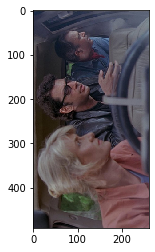

In [1]:
##ROTATION OF AN IMAGE WITHOUT USING INBUILT PYTHON FUNCTIONS:-
import numpy as np
from PIL import Image
import math as math
import matplotlib.pyplot as plt

image_rotate = Image.open(r"C:\Users\Attari2\Untitled Folder\Untitled Folder\rotate.png")
array = np.array(Image.open(r'C:\Users\Attari2\Untitled Folder\Untitled Folder\rotate.png'))

deg = int(input("Enter the rotation angle in degrees = "))
angle = math.radians(deg)

#HEIGHT AND WIDTH OF IMAGE 
height = array.shape[0]
width = array.shape[1]

## INITIALIZING NEW MIN AND MAX FOR ROTATED PICTURE

min_new_x = 0
max_new_x = 0
min_new_y = 0
max_new_y = 0


new_coordinates = []
##Rotation matrix :
##[
##[cos(theta) -sin(theta)]
##[sin(theta)  cos(theta)]
##]
for x in range(height):
    for y in range(width):
            new_x = int(round(x*math.cos(angle) - y*math.sin(angle)))
            new_y = int(round(x*math.sin(angle) + y*math.cos(angle)))
        
            val = array[x][y][:]
            new_coordinates.append((val, new_x, new_y))
            
            if new_x < min_new_x: 
                min_new_x = new_x
            if new_x > max_new_x: 
                max_new_x = new_x
            if new_y < min_new_y: 
                min_new_y = new_y
            if new_y > max_new_y: 
                max_new_y = new_y
                
new_height = max_new_x - min_new_x
new_width = max_new_y - min_new_y

rotated = np.zeros((new_height + 1, new_width + 1, 4))
x_offset = abs(min_new_x)
y_offset = abs(min_new_y)

for c in new_coordinates:
    val = c[0]
    x = c[1]
    y = c[2]
    if (rotated[x_offset + x][y_offset + y][0] == 0) & (rotated[x_offset + x][y_offset + y][1] == 0) & (rotated[x_offset + x][y_offset + y][2] == 0) & (rotated[x_offset + x][y_offset + y][3] == 0):
        rotated[x_offset + x][y_offset + y][0] = val[0]
        rotated[x_offset + x][y_offset + y][1] = val[1]
        rotated[x_offset + x][y_offset + y][2] = val[2]
        rotated[x_offset + x][y_offset + y][3] = val[3]

# FILLING VOID SPACES 
for i in range(rotated.shape[0]):
    prev = [rotated[i][0][0], rotated[i][0][1], rotated[i][0][2], rotated[i][0][3]]
    for j in range(rotated.shape[1]-1):
        # TO FIND VOID SPACE
        if (not any(rotated[i][j][:])) and (any(rotated[i][j+1][:])):
            rotated[i][j][:] = prev
        else:
            prev = rotated[i][j][:]

img = Image.fromarray(np.uint8(rotated))
img.save("rotated.png")
plt.imshow(img)